# Exporing the NASA Exoplanet Archive Tables 

The NASA Exoplanet Archive thoughtfully and painstakingly describes [the data columns](https://exoplanetarchive.ipac.caltech.edu/docs/API_PS_columns.html) it contains, as well as [how they merge the bazillions of different measurements from different references](https://exoplanetarchive.ipac.caltech.edu/docs/pscp_calc.html). 

*Here, we explore some visualizations of how the Planetary Systems (one row per reference) and Planetary Systems Composite (one row per planet) tables compare to one another, and how the data within those tables fits together. The plots here are designed mostly to help with weird nitty gritty internal decision making for the `exoatlas`. These plots are made with love and should not be seen as criticisms of the NASA Exoplanet Archive; the fine folks there do a herculean task to wrangle data from thousands of different papers.*

We include these in the documentation because it's useful to see these plots generated regularly as the Exoplanet Archive grows, but we hide it away at the end because we don't explain things particularly well (yet?).



In [ ]:
from exoatlas import * 
explorer = NASAExoplanetArchiveComparison()

## Are there weird unit problems? 

Weirdly, for some planets we'll get different answers whether we ingest the planet quantities like mass and radius in Earth units or in Jupiter units. This might be caused by units and/or rounding errors in the papers that got ingested into the archive. It's probably good to be aware of!

In [ ]:
explorer.do_units_check()

## Do masses and radii make sense? 

In the Planetary Systems Composite Parameters table, the archive calculates [mass and radius estimates for planets that don't have measurements from an empirical mass-radius relationship](https://exoplanetarchive.ipac.caltech.edu/docs/pscp_calc.html). An easy way to remove those theoretical estimates, is to eliminate values that don't have finite uncertainties associated with them. All measurements should have uncertainties! I believe this cut also removes some upper/lower limits (but don't quote me on that, yet).

In [ ]:
explorer.do_mass_radius_check()

## Are stellar luminosities, radii, and effective temperatures consistent?

By definition, it should be the case that for all stars the luminosity $L$ is exactly linked to its radius $R$ and effective temperature $T_{eff}$ as $$L = 4\pi R^2 \sigma T_{eff}^4$$ Is that true? No! Fascinatingly, there are a bunch of stars (mostly in the `ps` tables) that have $log_{10}(L/L_\odot)$ listed as exactly 1, regardless of reasonable radii and effective temperatures defined. Fortunately, most of those disappear when we filter out values that don't have uncertainties associated with them (= likely values from the TESS or Kepler input catalogs, one might wonder?). 

However, there are lots of stars that apparently have measurements (= existing uncertainties) of all three of $L, R, T_{eff}$ but yet have inconsistencies that amount to a factor of 2 in the inferred luminosity. It might be worth digging in a little more to see what sorts of systems they are and if there's anything we can do to improve the situation. In the meantime, we should probably be a smidge wary of exact stellar parameters!

In [ ]:
explorer.do_luminosity_check()

## What's in which table? 

First, let's take a few parameters to see how the contents of the Planetary Systems Composite Parameters table to the complete contents of the Planetary Systems table from which it is derived. Entirely (and foolishly) negelecting uncertainties on values and which values are limits, let's make some plots indicating the complete set of values that appear in `ps` for each planet + parameter in `pscomppars`.

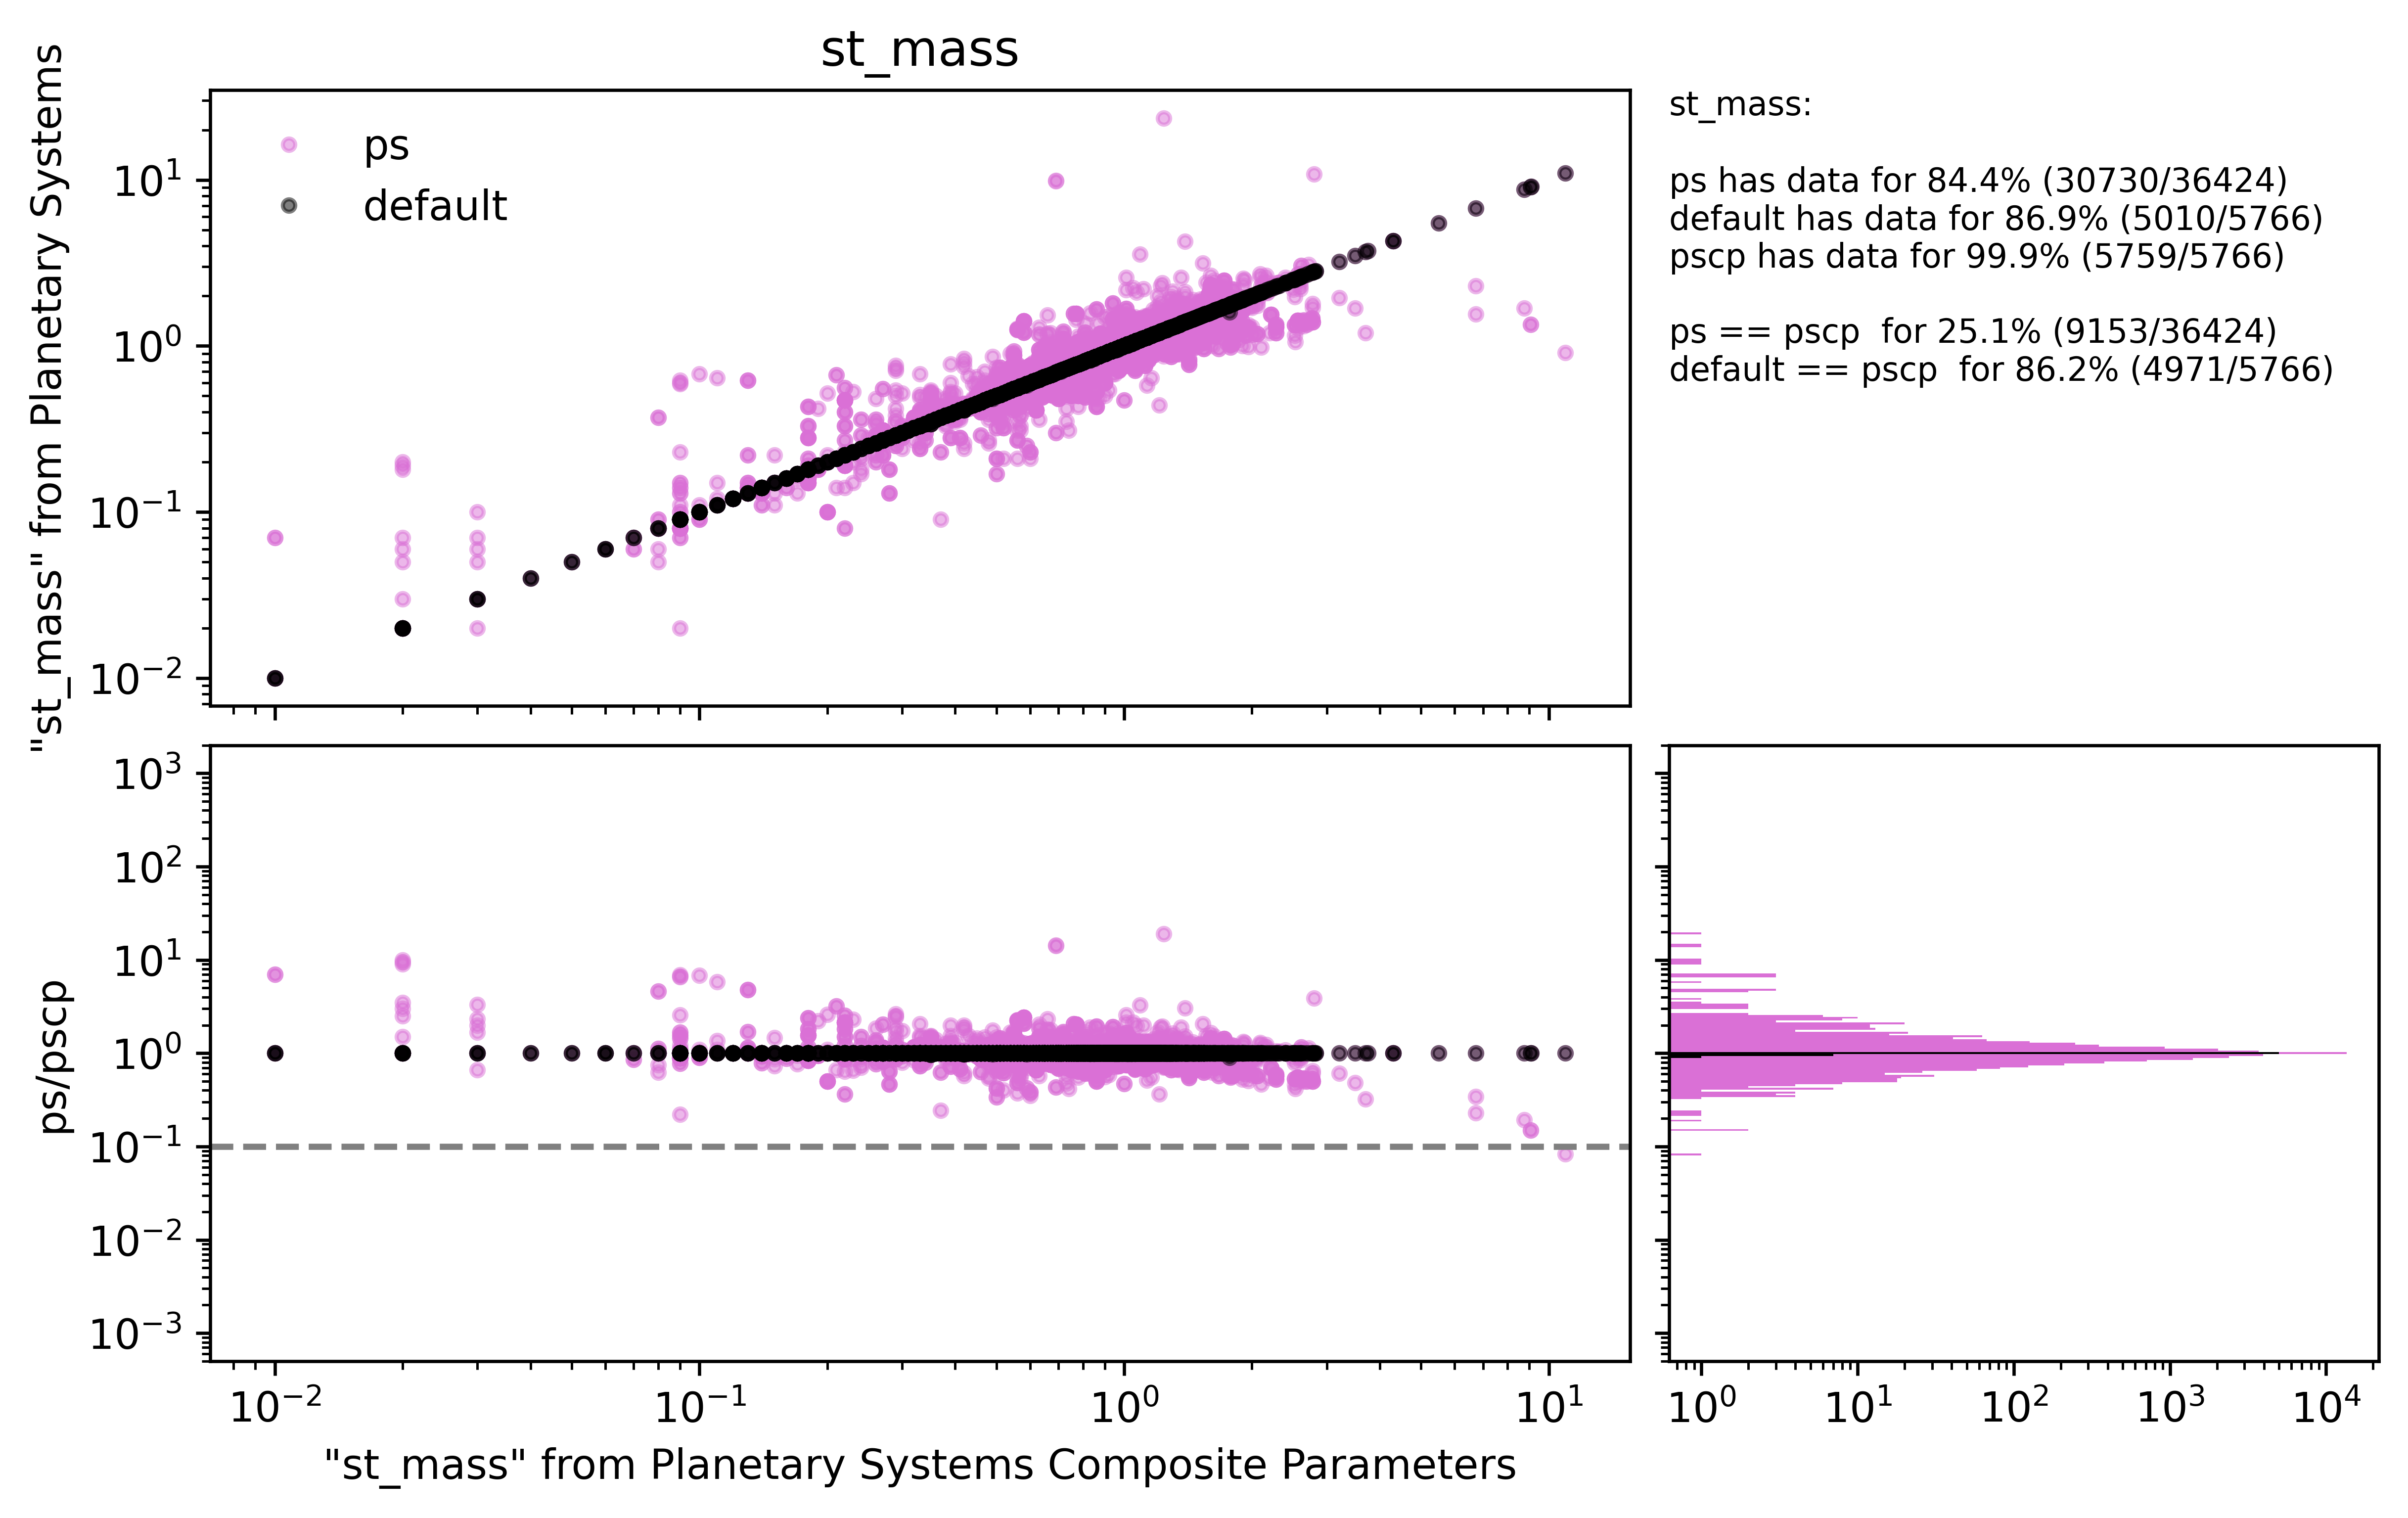

In [ ]:
explorer.do_completeness_check()

## How do we safely use transit periods, midpoints, durations? 

For planning future transit observations, we need to use a transit period, transit mid-point, and transit duration. If those three values come from different sources, it might potentially mess things up; it'd be good to check (a) how often if at all they come from the same reference, (b) what problems might emerge for prediciting transit events at the present day. Ideally, it would also be the case that (except maybe for extremely grazing transits) the quoted duration should be consistent with that calculated from the stellar and planetary properties; how often are transit durations actually quoted and how often are they right? 

For eclipses, we also need eccentricity and argument of periastron, it'd be lovely to extend these tests to eclipse timing too, but might require some more careful error propagation than we want to do here with the raw tables. 